## Imports

In [1]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.cluster import KMeans

In [2]:
dataframe = pandas.read_csv(r"C:\Users\justi\Downloads\Final Project\2. Data\Prepared\air_quality_prepared.csv")

## Data Prep

In [3]:
# Create subset of dataframe for use with k-means clustering
subset = dataframe[['O3 Mean', 'O3 AQI', 'CO Mean', 'CO AQI', 'SO2 Mean', 'SO2 AQI', 'NO2 Mean', 'NO2 AQI']]

In [5]:
# Standardize AQI columns so that they are not given more weight than other columns
lst = list()
for i in subset['O3 AQI']:
    lst.append(i/1000)
subset['O3 AQI'] = lst

lst = list()
for i in subset['CO AQI']:
    lst.append(i/10)
subset['CO AQI'] = lst

lst = list()
for i in subset['SO2 AQI']:
    lst.append(i/10)
subset['SO2 AQI'] = lst

In [6]:
subset.head()

,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI
0,0.019765,0.037,0.878947,2.5,3.000000,1.3,19.041667,46
1,0.015882,0.030,1.066667,2.6,1.958333,0.4,22.958333,34
2,0.009353,0.015,1.762500,2.8,5.250000,1.6,38.125000,48
3,0.015882,0.031,1.829167,3.4,7.083333,2.3,40.260870,72
4,0.007353,0.011,2.700000,4.2,8.708333,2.1,48.450000,58


## K-means Prep

In [7]:
# Create an elbow curve with a range of 1-10 to determine how many clusters to use
kmeans = [KMeans(n_clusters=i) for i in range(1,10)]

In [8]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))]

Text(0, 0.5, 'Score')

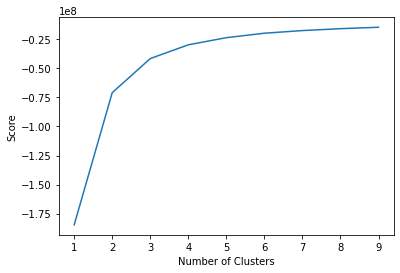

In [9]:
pyplot.plot(range(1, 10), score)
pyplot.xlabel('Number of Clusters')
pyplot.ylabel('Score')

## K-means Clustering

In [10]:
# Run the k-means clustering algorithm
kmeans = KMeans(n_clusters = 4)

In [11]:
kmeans.fit(subset)

KMeans(n_clusters=4)

In [12]:
# Create new column showing the results of the k-means clustering procedure
subset['Clusters'] = kmeans.fit_predict(subset)

Text(0, 0.5, 'NO2 Mean')

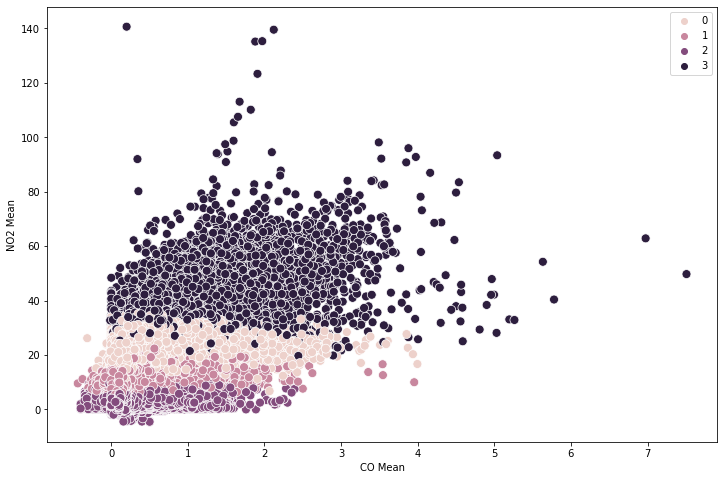

In [13]:
# Create visualizations using clustered data
pyplot.figure(figsize=(12,8))
seaborn.scatterplot(x=subset['CO Mean'], y=subset['NO2 Mean'], hue=kmeans.labels_, s=80)
pyplot.xlabel('CO Mean')
pyplot.ylabel('NO2 Mean')

Text(0, 0.5, 'NO2 Mean')

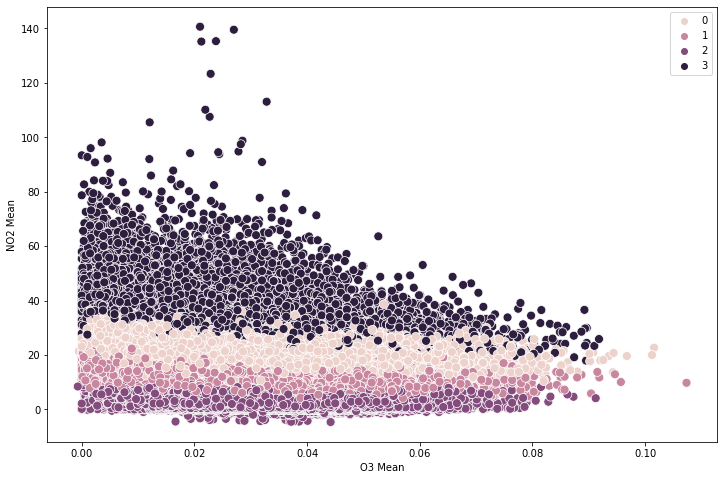

In [14]:
pyplot.figure(figsize=(12,8))
seaborn.scatterplot(x=subset['O3 Mean'], y=subset['NO2 Mean'], hue=kmeans.labels_, s=80)
pyplot.xlabel('O3 Mean')
pyplot.ylabel('NO2 Mean')

Text(0, 0.5, 'SO2 AQI')

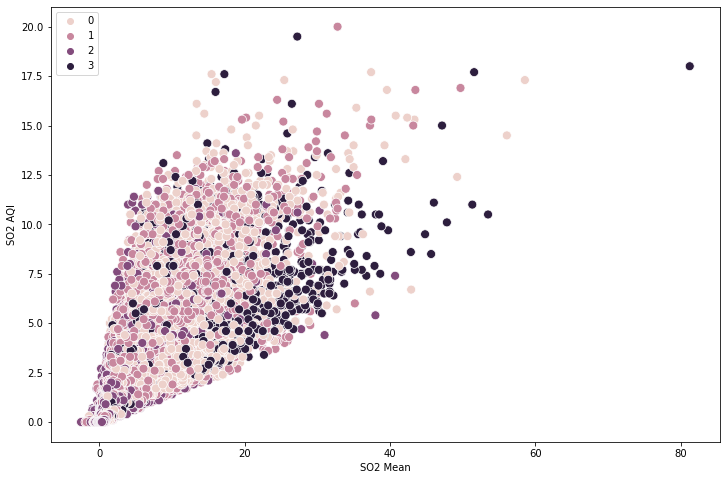

In [15]:
pyplot.figure(figsize=(12,8))
seaborn.scatterplot(x=subset['SO2 Mean'], y=subset['SO2 AQI'], hue=kmeans.labels_, s=80)
pyplot.xlabel('SO2 Mean')
pyplot.ylabel('SO2 AQI')

Text(0, 0.5, 'NO2 AQI')

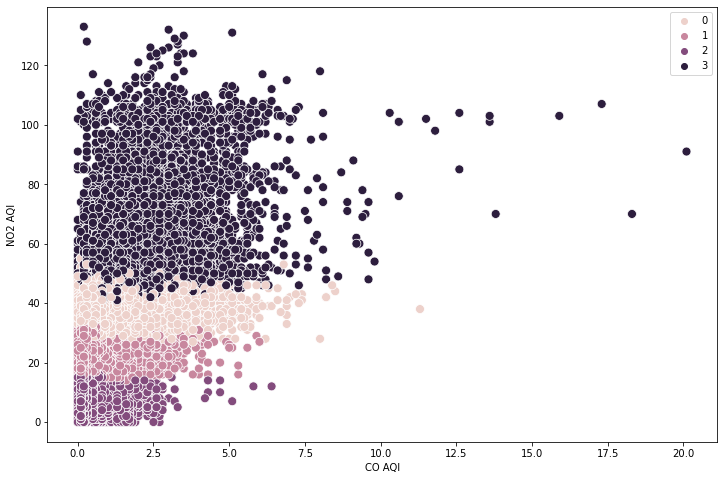

In [16]:
pyplot.figure(figsize=(12,8))
seaborn.scatterplot(x=subset['CO AQI'], y=subset['NO2 AQI'], hue=kmeans.labels_, s=80)
pyplot.xlabel('CO AQI')
pyplot.ylabel('NO2 AQI')

The clusters in the first, second, and fourth charts are grouped by values from lowest to highest on the y-axis, in the order of purple, light purple, tan, and dark purple. Additionally, the data points within each cluster become more and more dispersed, in the same cluster order.
The clusters in the third chart, which is the only chart that correlates a mean and an AQI, do not show any certain pattern.

In [17]:
# Create new column for cluster color
subset.loc[subset['Clusters'] == 0, 'Color'] = 'Tan'
subset.loc[subset['Clusters'] == 1, 'Color'] = 'Light purple'
subset.loc[subset['Clusters'] == 2, 'Color'] = 'Purple'
subset.loc[subset['Clusters'] == 3, 'Color'] = 'Dark purple'

In [18]:
# Show descriptive statistics for each cluster
subset.groupby('Color').agg({'O3 Mean':['mean', 'median'], 'CO Mean':['mean', 'median'], 'SO2 Mean':['mean', 'median'],
                               'NO2 Mean':['mean', 'median'], 'O3 AQI':['mean', 'median'], 'CO AQI':['mean', 'median'],
                               'SO2 AQI':['mean', 'median'], 'NO2 AQI':['mean', 'median']})

O3 Mean             CO Mean            SO2 Mean            \
                  mean    median      mean    median      mean    median   
Color                                                                      
Dark purple   0.020672  0.018143  0.855275  0.737500  3.650150  2.347826   
Light purple  0.028792  0.028294  0.297965  0.262500  1.507341  0.725000   
Purple        0.031475  0.031294  0.212947  0.200000  0.680274  0.304348   
Tan           0.025109  0.023588  0.465692  0.408333  2.376868  1.250000   

               NO2 Mean               O3 AQI           CO AQI         \
                   mean     median      mean median      mean median   
Color                                                                  
Dark purple   34.106747  33.106439  0.039099  0.031  1.514479    1.3   
Light purple  10.884278  10.583333  0.040260  0.036  0.466596    0.5   
Purple         4.018849   3.916667  0.037228  0.035  0.277522    0.2   
Tan           19.882578  19.565217  0.040487  0.034  0.817944    0.7   

               SO2 AQI           NO2 AQI         
                  mean median       mean median  
Color                                            
Dark purple   1.332569    0.7  55.409704   52.0  
Light purple  0.573528    0.3  22.281797   22.0  
Purple        0.206809    0.0   7.982251    8.0  
Tan           0.905024    0.4  36.462084   36.0

The mean and median for all variables, except O3 Mean and O3 AQI, are ordered from highest to lowest by the colors dark purple, tan, light purple, purple.

## Conclusions

These results will not be useful for future analytical steps because the original intent for this dataset was for temporal and spatial analysis. However, if someone did want to use this dataset in a way that involved the comparsion of quantitative variables, these results could be used to further investigate the relationship between the dispersal of the data points and the values of the data points (larger data point values seem to be correlated to a higher degree of dispersal among the data points).